# Yemeksepeti Order Data Analysis Report




# A**nalysis Overview**
This report presents a detailed analysis of Yemeksepeti order data, focusing on evaluating the performance of the self-service channel, assessing order fulfillment rates, and measuring customer satisfaction. The analysis employs Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn to provide actionable insights aimed at enhancing customer experience and optimizing business operations.


# **Key Areas of Analysis**

1. Self-Service Channel Performance:

* Success Rate: Analyze the percentage of issues resolved
through self-service and compare success rates across different issue types.
* Customer Satisfaction: Compare CSAT and NPS scores between self-service users and those who contacted customer service. Analyze open-ended feedback for improvement suggestions.
2. Seamless Orders Analysis:

* Order Lifecycle: Examine at which stages issues occur and their impact on seamless order rates.
* Customer Segments: Compare seamless order rates across different customer segments.
* Kitchen Type and Payment Method: Analyze correlations between kitchen types, payment methods, and seamless order rates.
# **Methods and Tools:**

* Data Source: Data is sourced from Yemeksepeti's internal databases or API.
* Analytical Techniques: Utilized exploratory data analysis, statistical tests, and data visualization.
* Machine Learning: Considered for predicting customer behavior and automating issue classification.

# **Impact and Recommendations:**
The insights derived from this analysis aim to optimize business operations, enhance customer experience, and drive growth. Key recommendations include optimizing self-service solutions, addressing common issues, and refining marketing and support strategies.

# 1. Data Understanding and Preparation

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
from openpyxl import load_workbook

In [1]:
from google.colab import files
uploaded = files.upload()

Saving yemeksepeti_orders.xlsx to yemeksepeti_orders.xlsx


In [3]:
import io
df = pd.read_excel(io.BytesIO(uploaded['yemeksepeti_orders.xlsx']))
df

,order_id,order_time,order_city,order_area,order_kitchen,order_restaurant_id,order_size_TRY,preffered_payment_method,isSeamless,isnotSeamless,contact_reason_CSRLevel3,contact_reason_MainGroup,isContact,isSelfService,ContactCSAT,SelfServiceCSAT,NPS-Q-Score
0,9450303,2024-07-26 01:26:02,İstanbul,Sancaktepe,Kahvaltı,723542,103,Online Payment,1,0,-,-,0,0,0,0,8
1,3091190,2024-02-24 13:44:21,İstanbul,Şile,Pizza,207622,80,Cash,1,0,-,-,0,0,0,0,4
2,8040029,2024-01-06 19:26:41,İstanbul,Beykoz,Pide,35740,168,Cash,1,0,-,-,0,0,0,0,10
3,9828010,2024-08-23 16:32:36,İstanbul,Bakırköy,Burger,614173,104,Credit/Debit Card,1,0,-,-,0,0,0,0,8
4,7887475,2024-07-19 09:23:03,İstanbul,Büyükçekmece,Burger,818521,415,Online Payment,1,0,-,-,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6823941,2024-03-21 14:58:48,İstanbul,Ataşehir,Pide,529907,209,Credit/Debit Card,1,0,-,-,0,0,0,0,5
49996,1208839,2024-02-11 09:57:30,İstanbul,Kartal,Çiğköfte,271839,80,Online Payment,1,0,-,-,0,0,0,0,8
49997,1657925,2024-05-17 13:52:45,İstanbul,Ümraniye,Burger,869624,122,Online Payment,1,0,-,-,0,0,0,0,8
49998,6576510,2024-02-15 12:52:51,İstanbul,Üsküdar,Burger,537218,488,Meal Card,1,0,-,-,0,0,0,0,10


It was not checked whether there was missing data, the missing data was changed, and the visualization and interpretation process was started.

# 2. Data Visualization and Analysis

# 2.1. Order Distribution
Understand which kitchen types are most popular and which cities have the highest number of orders.

<ipython-input-14-8765da4df463>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_kitchens.index, y=top_kitchens_percent.values, palette='viridis')


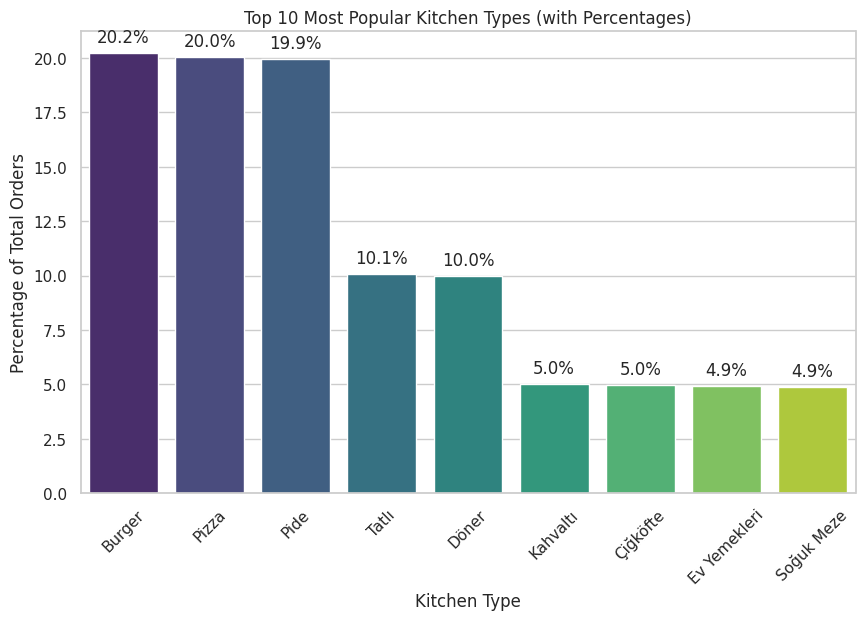

<ipython-input-14-8765da4df463>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.index, y=top_areas_percent.values, palette='viridis')


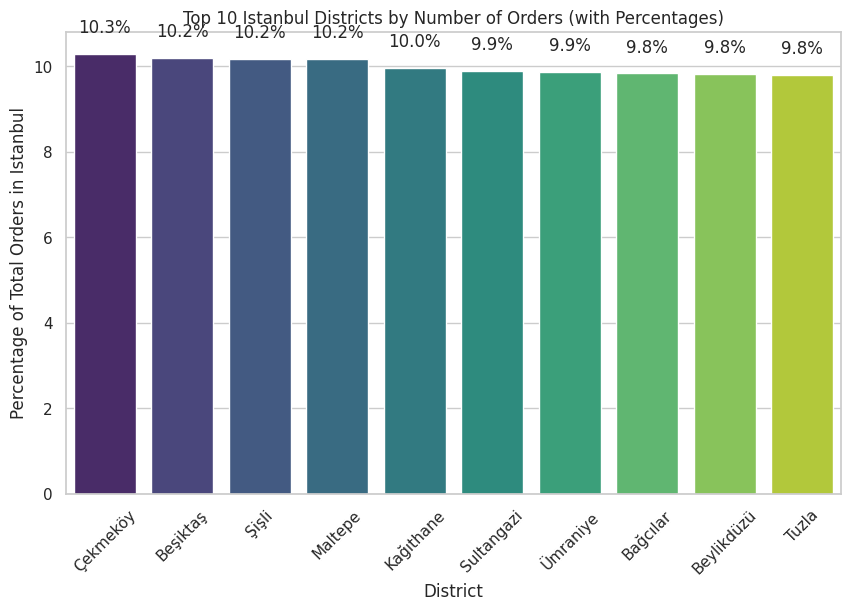

In [14]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Top 10 most popular kitchen types with percentages
top_kitchens = df['order_kitchen'].value_counts().head(10)
top_kitchens_percent = (top_kitchens / top_kitchens.sum()) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=top_kitchens.index, y=top_kitchens_percent.values, palette='viridis')
plt.title('Top 10 Most Popular Kitchen Types (with Percentages)')
plt.xlabel('Kitchen Type')
plt.ylabel('Percentage of Total Orders')
plt.xticks(rotation=45)
for i, value in enumerate(top_kitchens_percent):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center')
plt.show()

# Top 10 Istanbul districts by number of orders with percentages
istanbul_data = df[df['order_city'] == 'İstanbul']
top_areas = istanbul_data['order_area'].value_counts().head(10)
top_areas_percent = (top_areas / top_areas.sum()) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=top_areas.index, y=top_areas_percent.values, palette='viridis')
plt.title('Top 10 Istanbul Districts by Number of Orders (with Percentages)')
plt.xlabel('District')
plt.ylabel('Percentage of Total Orders in Istanbul')
plt.xticks(rotation=45)
for i, value in enumerate(top_areas_percent):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center')
plt.show()

# 2.2. Payment Methods
This combination of visualizations offers a clear view of the customers' payment preferences, both in terms of raw numbers and their proportional representation.

<ipython-input-15-050e21b95919>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_methods.index, y=payment_methods_percent.values, palette='viridis')


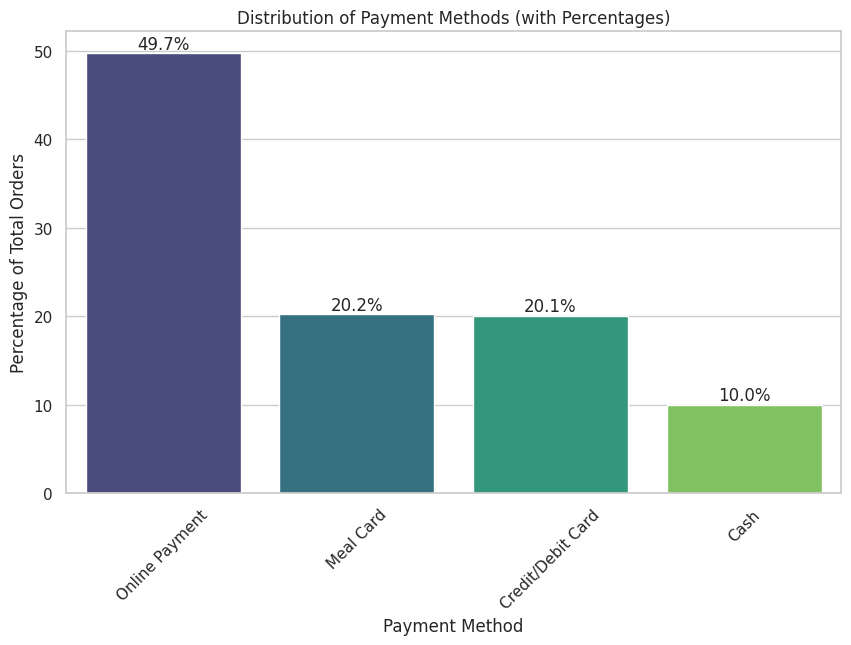

In [15]:
# Count the number of orders for each payment method
payment_methods = df['preffered_payment_method'].value_counts()
payment_methods_percent = (payment_methods / payment_methods.sum()) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_methods.index, y=payment_methods_percent.values, palette='viridis')
plt.title('Distribution of Payment Methods (with Percentages)')
plt.xlabel('Payment Method')
plt.ylabel('Percentage of Total Orders')
plt.xticks(rotation=45)
for i, value in enumerate(payment_methods_percent):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center')
plt.show()


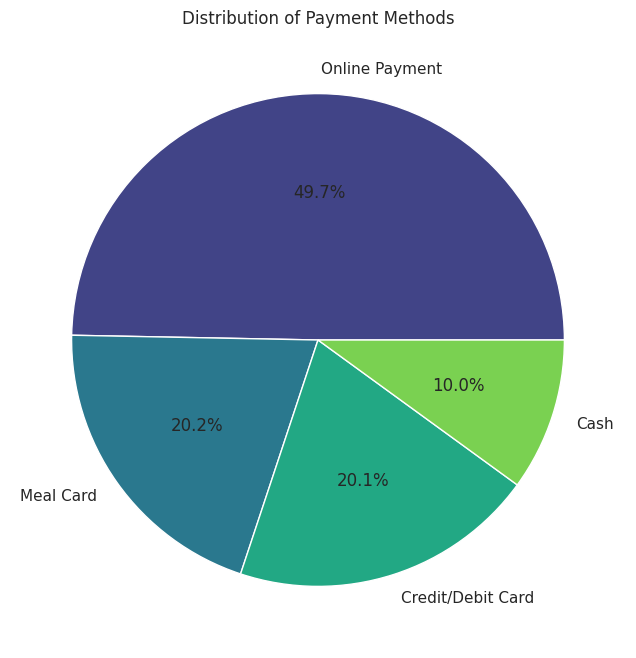

In [16]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_methods, labels=payment_methods.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(payment_methods)))
plt.title('Distribution of Payment Methods')
plt.show()


# 2.3. Order Times
These visualizations together provide a comprehensive view of customer behavior over time, helping you understand when the demand is highest and plan accordingly.


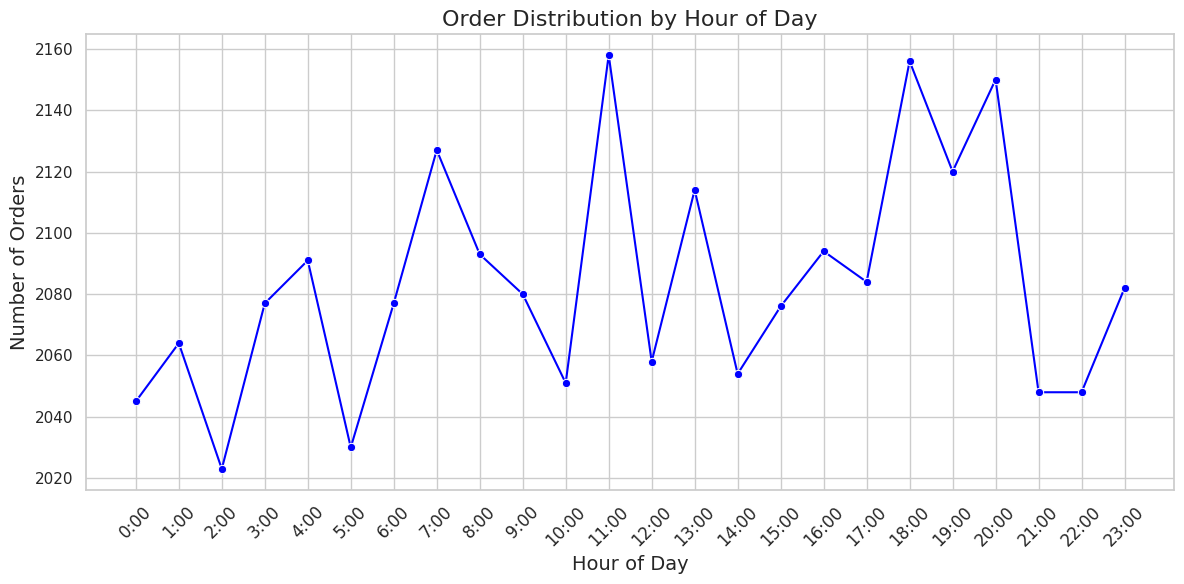

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting hour from order_time
df['order_hour'] = df['order_time'].dt.hour

# Aggregating orders by hour
hourly_orders = df['order_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_orders.index, y=hourly_orders.values, marker='o', color='blue')

plt.title('Order Distribution by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

# Setting x-ticks to every hour and rotating them
plt.xticks(ticks=hourly_orders.index, labels=[f'{i}:00' for i in hourly_orders.index], fontsize=12, rotation=45)

# Improve layout
plt.tight_layout()

plt.show()

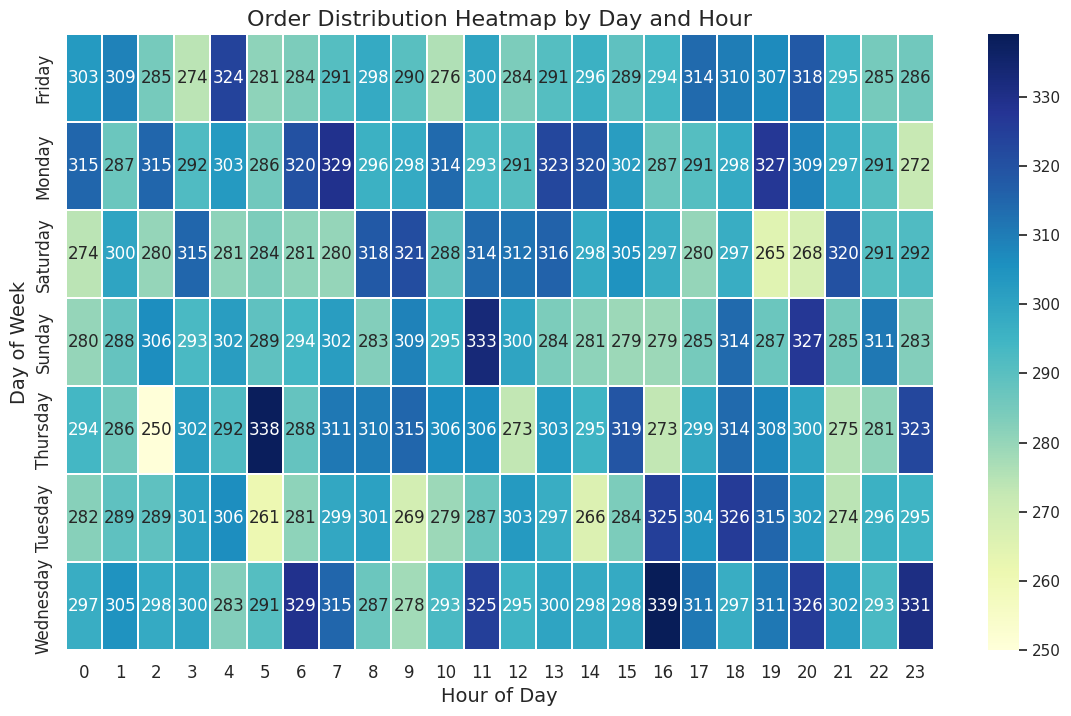

In [21]:
# Creating a pivot table for heatmap
hourly_heatmap = df.pivot_table(index=df['order_time'].dt.day_name(),
                                columns=df['order_time'].dt.hour,
                                values='order_id',
                                aggfunc='count').fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(hourly_heatmap, cmap="YlGnBu", linewidths=0.1, annot=True, fmt=".0f", cbar=True)

plt.title('Order Distribution Heatmap by Day and Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Day of Week', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# 2.4. Calculating Averages
First, let’s calculate the average order size. If delivery time data were available, we’d calculate that too.

In [23]:
# Calculate the average order size in TRY
average_order_size = df['order_size_TRY'].mean()
print(f"Average Order Size (TRY): {average_order_size:.2f}")

# If delivery time data is available, you could calculate it like this:
# df['delivery_time'] = df['delivery_end_time'] - df['delivery_start_time']  # Adjust if necessary
# average_delivery_time = df['delivery_time'].mean()
# print(f"Average Delivery Time (minutes): {average_delivery_time:.2f}")


Average Order Size (TRY): 366.18


# 2.5. Distribution Analysis
Next, let’s examine the distribution of order sizes and, if available, delivery times.

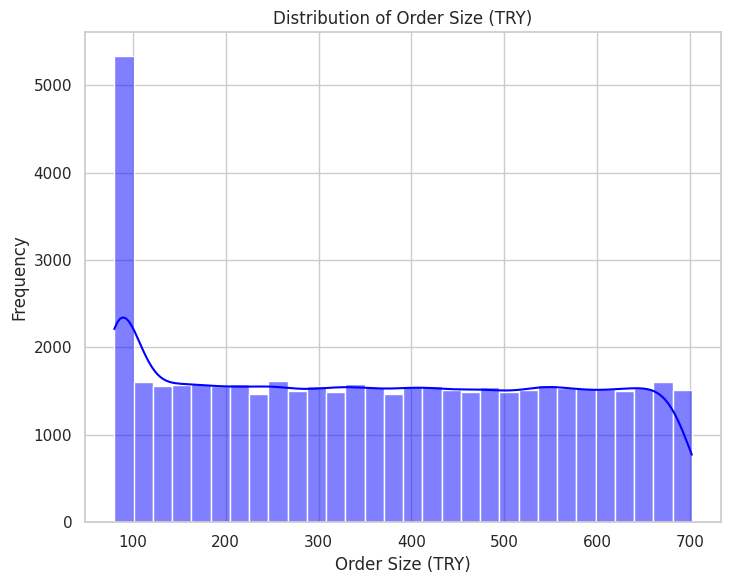

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Histogram for Order Size
plt.subplot(1, 2, 1)
sns.histplot(df['order_size_TRY'], bins=30, kde=True, color='blue')
plt.title('Distribution of Order Size (TRY)')
plt.xlabel('Order Size (TRY)')
plt.ylabel('Frequency')

# If delivery time data is available, you could create a histogram like this:
# plt.subplot(1, 2, 2)
# sns.histplot(df['delivery_time'], bins=30, kde=True, color='green')
# plt.title('Distribution of Delivery Time (minutes)')
# plt.xlabel('Delivery Time (minutes)')
# plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


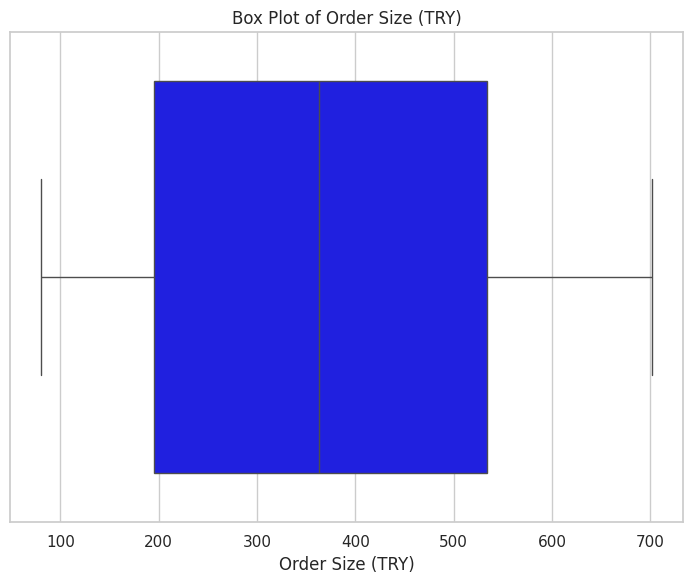

In [25]:
plt.figure(figsize=(14, 6))

# Box Plot for Order Size
plt.subplot(1, 2, 1)
sns.boxplot(x=df['order_size_TRY'], color='blue')
plt.title('Box Plot of Order Size (TRY)')
plt.xlabel('Order Size (TRY)')

# If delivery time data is available, you could create a box plot like this:
# plt.subplot(1, 2, 2)
# sns.boxplot(x=df['delivery_time'], color='green')
# plt.title('Box Plot of Delivery Time (minutes)')
# plt.xlabel('Delivery Time (minutes)')

plt.tight_layout()
plt.show()


# 2.6. Correlation Analysis
Finally, let’s explore the relationships between different variables. We’ll use a correlation matrix and a heatmap to visualize these relationships.



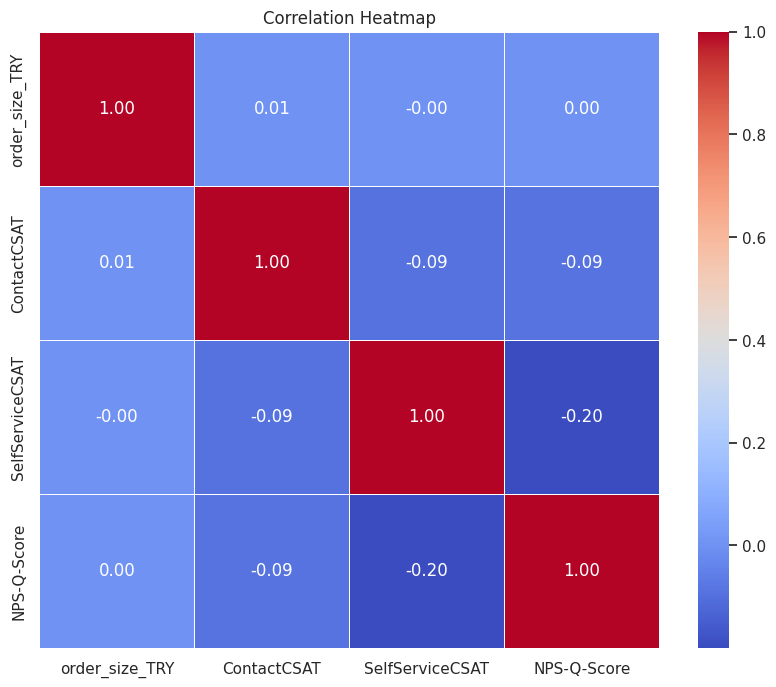

In [26]:
# Calculate the correlation matrix for selected variables
correlation_matrix = df[['order_size_TRY', 'ContactCSAT', 'SelfServiceCSAT', 'NPS-Q-Score']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# 3. Self-Service Analysis

# 3.1. Success Rate

a. Percentage of Issues Resolved Through Self-Service

In [29]:
# Calculate the total number of issues and self-service issues
total_issues = len(df)
self_service_issues = len(df[df['isSelfService'] == 1])

# Calculate the percentage of issues resolved through self-service
self_service_percentage = (self_service_issues / total_issues) * 100
print(f"Percentage of Issues Resolved Through Self-Service: {self_service_percentage:.2f}%")

Percentage of Issues Resolved Through Self-Service: 20.37%


b. Success Rate by Issue Type


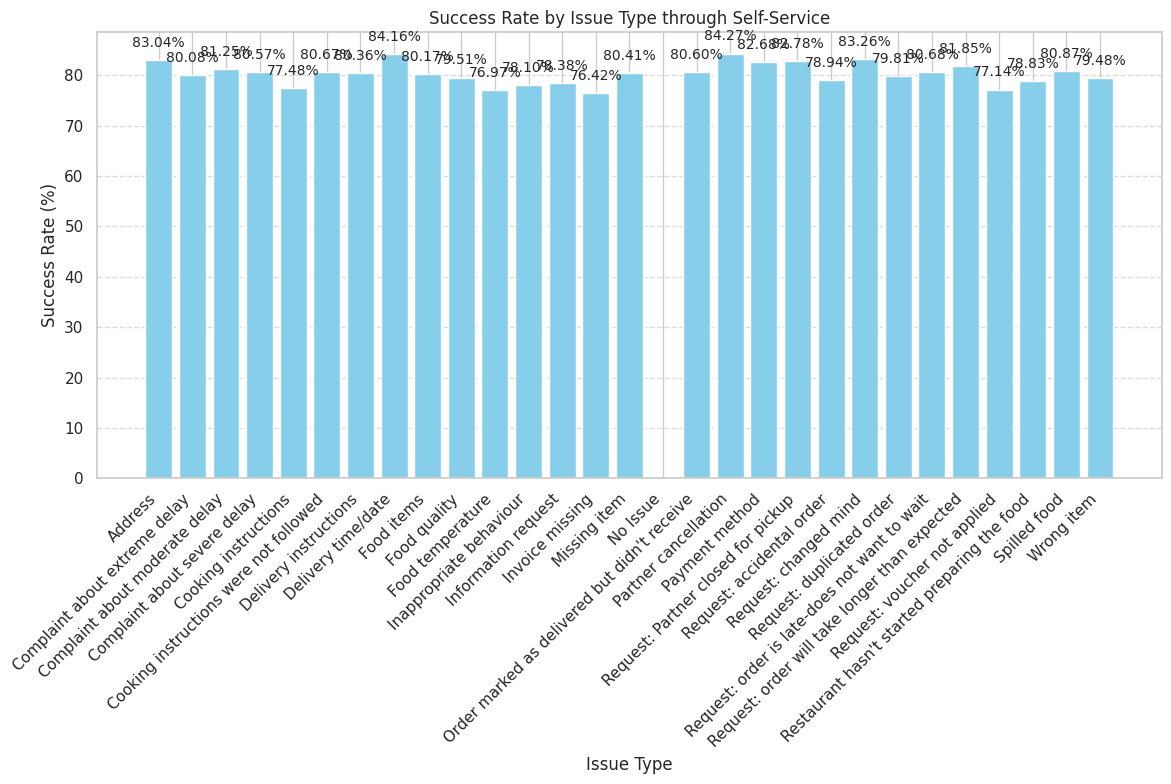

In [43]:
# Ensure 'contact_reason_CSRLevel3' has meaningful values
df['contact_reason_CSRLevel3'] = df['contact_reason_CSRLevel3'].replace('-', 'No Issue')

# Count total issues by issue type
issue_counts = df['contact_reason_CSRLevel3'].value_counts()

# Count self-service resolved issues by issue type
self_service_counts = df[df['isSelfService'] == 1]['contact_reason_CSRLevel3'].value_counts()

# Calculate success rates for each issue type
success_rate = (self_service_counts / issue_counts) * 100

# Convert to DataFrame for handling and visualization
success_rate_df = pd.DataFrame(success_rate).reset_index()
success_rate_df.columns = ['Issue Type', 'Success Rate (%)']

# Prepare DataFrame for merging
issue_counts_df = pd.DataFrame(issue_counts).reset_index()
issue_counts_df.columns = ['Issue Type', 'Total Issues']

# Merge DataFrames to include total issues
success_rate_df = success_rate_df.merge(issue_counts_df, on='Issue Type')

# Round success rate to 2 decimal places
success_rate_df['Success Rate (%)'] = success_rate_df['Success Rate (%)'].round(2)

# Plotting the success rate by issue type
plt.figure(figsize=(12, 8))
bars = plt.bar(success_rate_df['Issue Type'], success_rate_df['Success Rate (%)'], color='skyblue')

# Adding percentage labels on top of bars with an offset to prevent overlap
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Success Rate by Issue Type through Self-Service')
plt.xlabel('Issue Type')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3.2. Satisfaction

ContactCSAT Average: 0.1366
SelfServiceCSAT Average: 0.56574


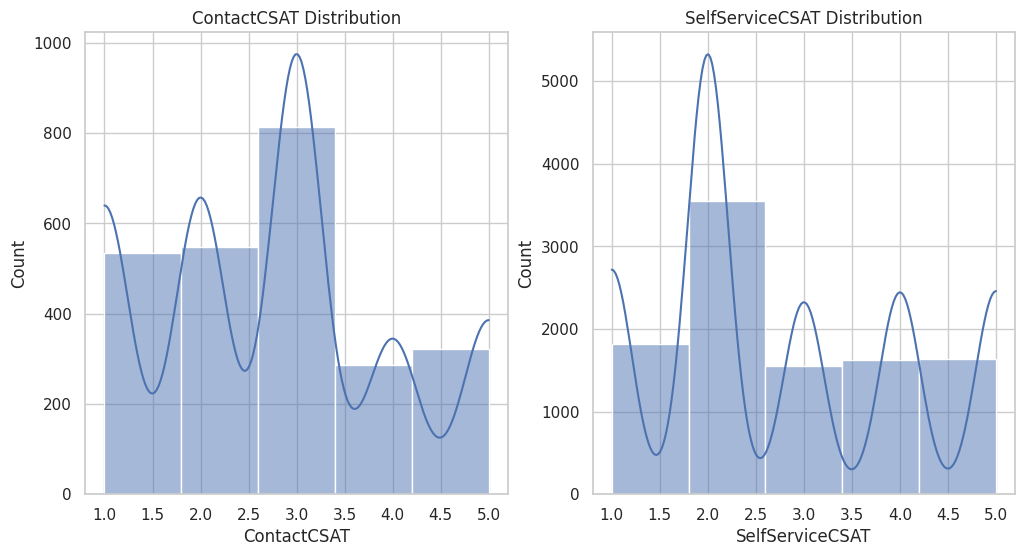

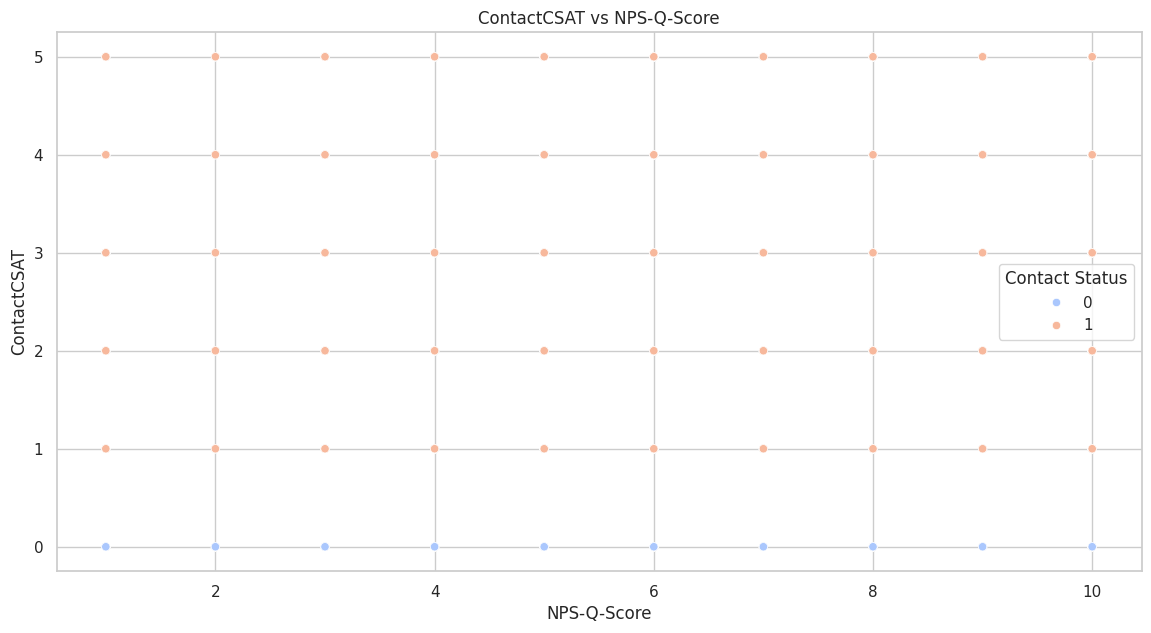

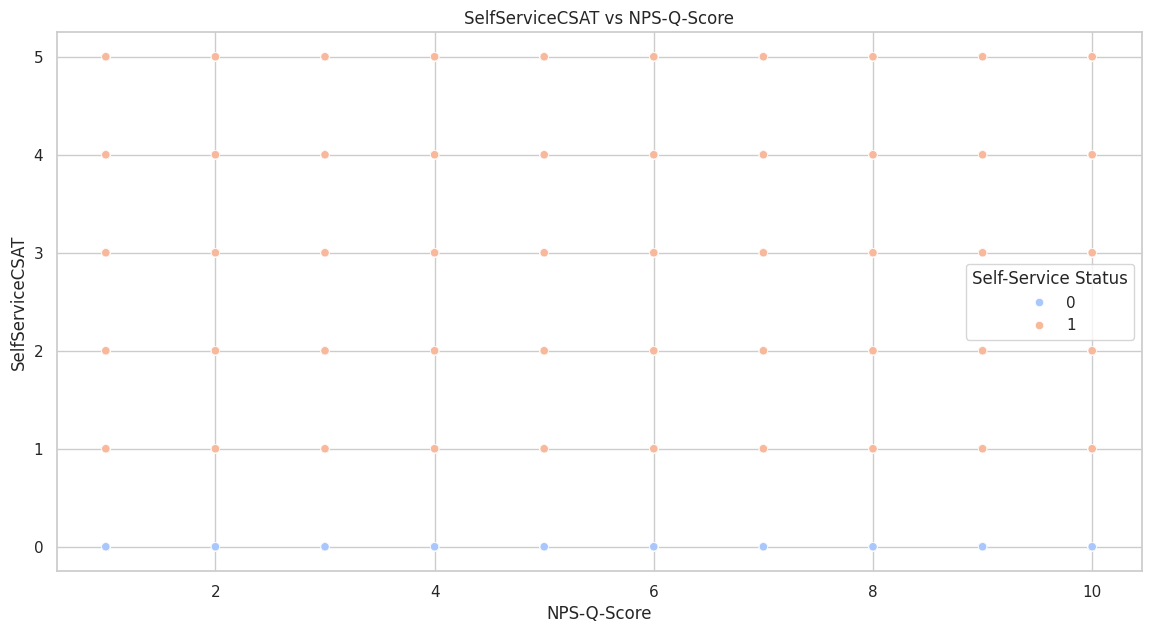

In [58]:
# Basic statistics for satisfaction scores
print("ContactCSAT Average:", df['ContactCSAT'].mean())
print("SelfServiceCSAT Average:", df['SelfServiceCSAT'].mean())

# Distribution of satisfaction scores
plt.figure(figsize=(12, 6))

# ContactCSAT distribution
plt.subplot(1, 2, 1)
sns.histplot(df[df['isContact'] == 1]['ContactCSAT'], bins=5, kde=True)
plt.title('ContactCSAT Distribution')

# SelfServiceCSAT distribution
plt.subplot(1, 2, 2)
sns.histplot(df[df['isSelfService'] == 1]['SelfServiceCSAT'], bins=5, kde=True)
plt.title('SelfServiceCSAT Distribution')

plt.show()

# Correlation of satisfaction scores with NPS-Q-Score
plt.figure(figsize=(14, 7))

# ContactCSAT vs NPS-Q-Score
sns.scatterplot(x='NPS-Q-Score', y='ContactCSAT', data=df, hue='isContact', palette='coolwarm')
plt.title('ContactCSAT vs NPS-Q-Score')
plt.xlabel('NPS-Q-Score')
plt.ylabel('ContactCSAT')
plt.legend(title='Contact Status')
plt.show()

# SelfServiceCSAT vs NPS-Q-Score
plt.figure(figsize=(14, 7))

sns.scatterplot(x='NPS-Q-Score', y='SelfServiceCSAT', data=df, hue='isSelfService', palette='coolwarm')
plt.title('SelfServiceCSAT vs NPS-Q-Score')
plt.xlabel('NPS-Q-Score')
plt.ylabel('SelfServiceCSAT')
plt.legend(title='Self-Service Status')
plt.show()


# 3.3. Order Stages Analysis

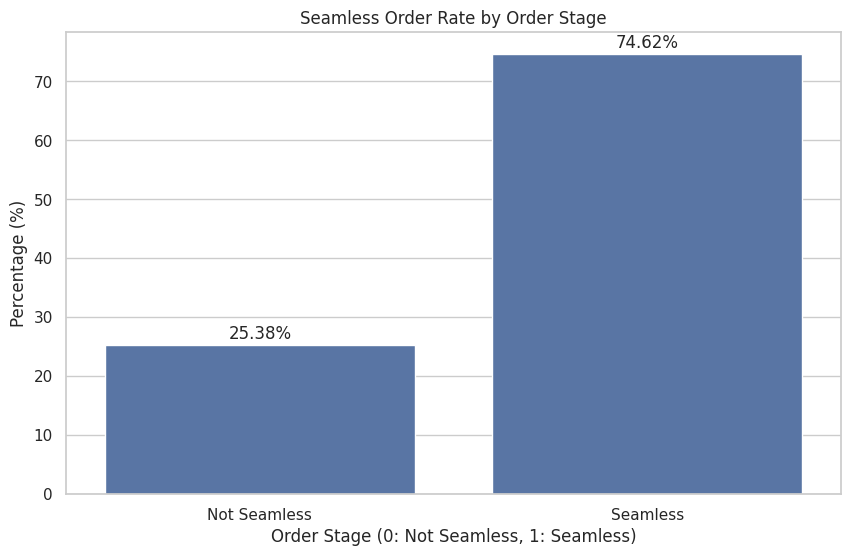

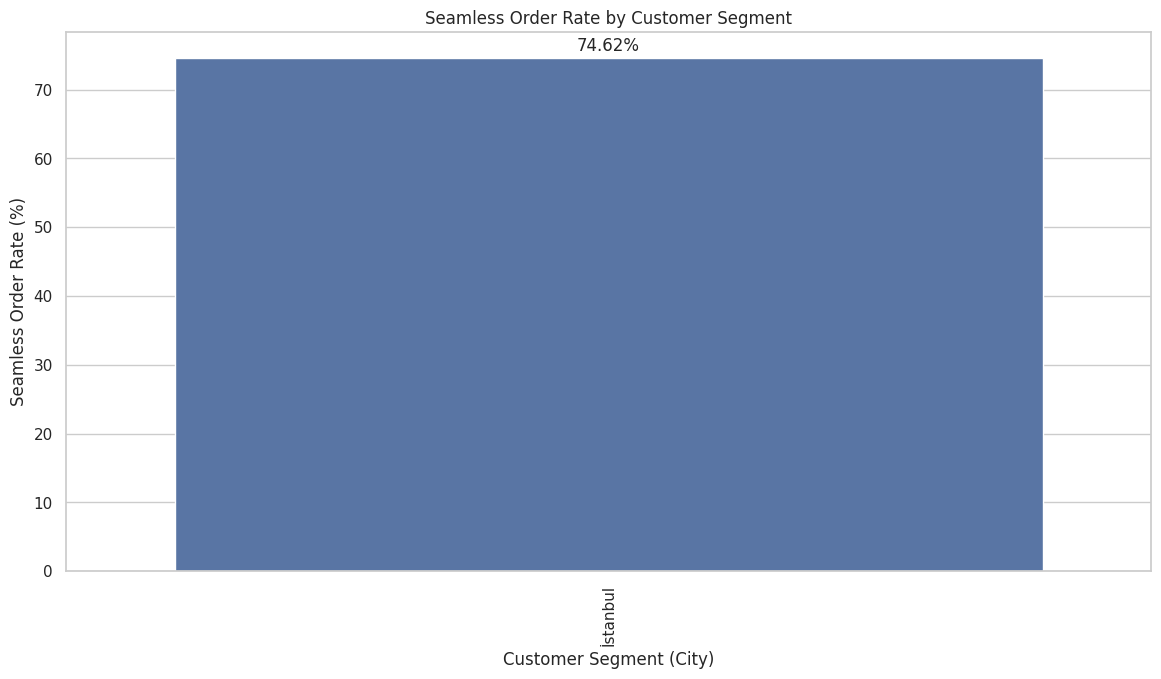

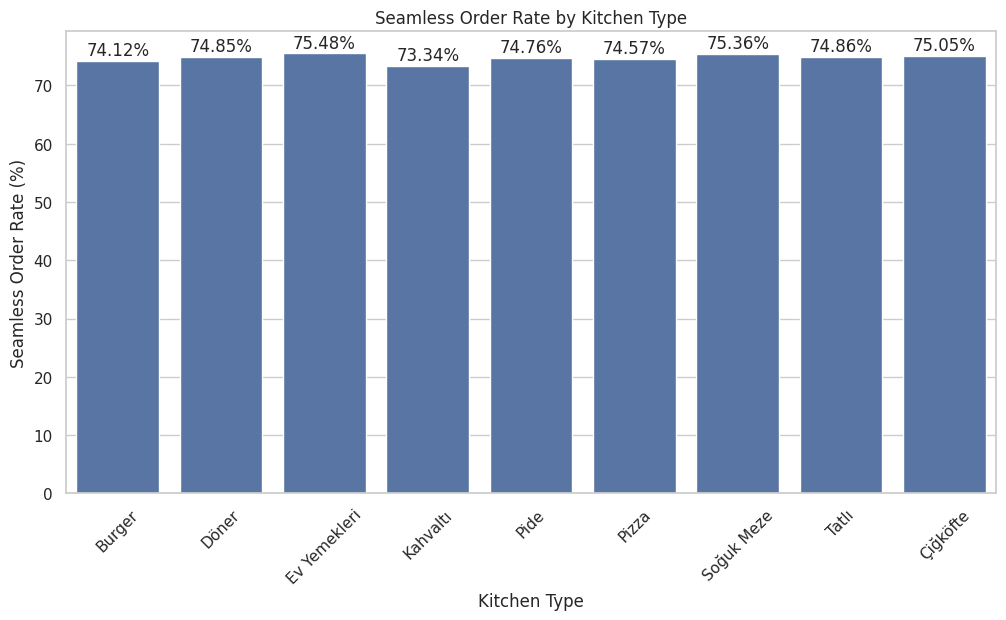

Column 'preferred_payment_method' does not exist in the DataFrame.


In [62]:
# Seamless Order Rate Analysis
# Calculate seamless order rate by order stage
order_stage_summary = df.groupby('isSeamless').size().reset_index(name='Count')
order_stage_summary['Percentage (%)'] = (order_stage_summary['Count'] / order_stage_summary['Count'].sum() * 100).round(2)

plt.figure(figsize=(10, 6))
sns.barplot(x='isSeamless', y='Percentage (%)', data=order_stage_summary)
plt.title('Seamless Order Rate by Order Stage')
plt.xlabel('Order Stage (0: Not Seamless, 1: Seamless)')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['Not Seamless', 'Seamless'])
for index, value in enumerate(order_stage_summary['Percentage (%)']):
    plt.text(index, value + 1, f'{value}%', ha='center')
plt.show()

# Customer Segment Analysis
# Assuming 'order_city' as a customer segment, adjust as needed
customer_segment_summary = df.groupby(['order_city', 'isSeamless']).size().unstack().fillna(0)
customer_segment_summary['Total'] = customer_segment_summary.sum(axis=1)
customer_segment_summary['Seamless Rate (%)'] = (customer_segment_summary[1] / customer_segment_summary['Total'] * 100).round(2)

plt.figure(figsize=(14, 7))
sns.barplot(x=customer_segment_summary.index, y='Seamless Rate (%)', data=customer_segment_summary.reset_index())
plt.title('Seamless Order Rate by Customer Segment')
plt.xlabel('Customer Segment (City)')
plt.ylabel('Seamless Order Rate (%)')
plt.xticks(rotation=90)
for index, value in enumerate(customer_segment_summary['Seamless Rate (%)']):
    plt.text(index, value + 1, f'{value}%', ha='center')
plt.show()

# Kitchen Type and Payment Method Correlation Analysis
# Kitchen type correlation with seamless order rate
kitchen_summary = df.groupby('order_kitchen')['isSeamless'].mean().reset_index()
kitchen_summary['Seamless Rate (%)'] = (kitchen_summary['isSeamless'] * 100).round(2)

plt.figure(figsize=(12, 6))
sns.barplot(x='order_kitchen', y='Seamless Rate (%)', data=kitchen_summary)
plt.title('Seamless Order Rate by Kitchen Type')
plt.xlabel('Kitchen Type')
plt.ylabel('Seamless Order Rate (%)')
plt.xticks(rotation=45)
for index, value in enumerate(kitchen_summary['Seamless Rate (%)']):
    plt.text(index, value + 1, f'{value}%', ha='center')
plt.show()

# Payment method correlation with seamless order rate
if 'preferred_payment_method' in df.columns:
    payment_summary = df.groupby('preferred_payment_method')['isSeamless'].mean().reset_index()
    payment_summary['Seamless Rate (%)'] = (payment_summary['isSeamless'] * 100).round(2)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='preferred_payment_method', y='Seamless Rate (%)', data=payment_summary)
    plt.title('Seamless Order Rate by Payment Method')
    plt.xlabel('Payment Method')
    plt.ylabel('Seamless Order Rate (%)')
    plt.xticks(rotation=45)
    for index, value in enumerate(payment_summary['Seamless Rate (%)']):
        plt.text(index, value + 1, f'{value}%', ha='center')
    plt.show()
else:
    print("Column 'preferred_payment_method' does not exist in the DataFrame.")

# Key Insights and Recommendations

# 1. **Kitchen Preferences**
The data reveals that fast food dominates customer preferences, with burgers (20.2%), pizza (20%), and pide (19.9%) making up over 60% of all orders. This strong preference suggests that Yemeksepeti's marketing and partnership efforts should continue to focus on these popular kitchen types. However, the relatively lower percentages for traditional Turkish dishes like ev yemekleri (4.9%) and soğuk meze (4.9%) indicate potential areas for growth. Promoting these cuisines could diversify offerings and attract a wider audience.

# **2. Geographic Distribution of Orders**
Orders are fairly evenly distributed across various districts, with Çekmeköy (10.3%), Beşiktaş (10.2%), and Şişli (10.2%) leading the pack. This indicates a broad customer base across Istanbul. However, the slight differences in order volumes between districts suggest that there might be district-specific factors influencing order behavior. Understanding these local preferences and addressing any potential barriers could enhance customer engagement in districts with lower order volumes.

# **3. Payment Methods**
Online payment is the most popular method, accounting for 49.7% of transactions, followed by meal cards (20.2%) and credit/debit cards (20.1%). The low percentage of cash payments (10%) aligns with the global trend towards cashless transactions. Yemeksepeti should continue to enhance and promote online payment options to maintain and potentially increase this trend. Additionally, exploring partnerships with meal card providers could further capitalize on the 20.2% share, especially in corporate areas.

# **4. Order Timing**
The highest order volume occurs at 11 AM, indicating a strong demand for lunch deliveries. Conversely, the lowest volume at 2 AM suggests minimal activity during late-night hours. To optimize operations, Yemeksepeti could consider aligning marketing campaigns and delivery resources with these peak and off-peak hours. Promotions could be tailored to encourage orders during lower-traffic times, potentially smoothing out demand and improving operational efficiency.

# **5. Average Order Size**
The average order size of 366.18 TRY provides a benchmark for typical customer spending. This figure can be used to assess the effectiveness of upselling and cross-selling strategies. Yemeksepeti could explore personalized recommendations and bundling options to increase average order value further.

# **6. Self-Service Channel Efficiency**
With 20.37% of issues resolved through the self-service channel, there’s a significant portion of customers successfully using this option. However, considering the higher average CSAT score for self-service (0.56574) compared to the contact channel (0.1366), there is clear evidence that customers prefer resolving issues on their own when possible. This suggests that further investment in enhancing and promoting the self-service channel could lead to even greater customer satisfaction and reduced operational costs.

# **7. Customer Satisfaction (CSAT)**
The considerable difference between self-service and contact channel CSAT scores highlights the importance of empowering customers with effective self-service tools. The higher satisfaction with self-service suggests that customers value speed and convenience. Yemeksepeti should focus on improving the user interface, expanding self-service options, and ensuring that these solutions are easy to use and accessible.

# **8. Seamless Order Experience**
A 74.62% seamless order rate indicates that the majority of orders are processed without issues. However, the 25.38% non-seamless order rate represents an opportunity for improvement. Analyzing the root causes of these disruptions and implementing targeted interventions, such as improving logistics or restaurant partnerships, could further enhance the customer experience.

# **Recommendations**

* Enhance Fast Food Offerings: Continue focusing on fast food options while promoting underrepresented kitchen types to diversify the menu.
* Localized Marketing Strategies: Tailor marketing efforts to the unique preferences and behaviors of different districts.
Promote Cashless Payments: Strengthen online payment options and explore additional partnerships with meal card providers.
* Optimize for Peak Hours: Align marketing and operational resources with peak order times, and create promotions for off-peak hours.
* Invest in Self-Service: Improve the self-service channel to increase its adoption and further enhance customer satisfaction.
* Reduce Non-Seamless Orders: Identify and address the causes of non-seamless orders to increase overall order fulfillment efficiency.
* By implementing these strategies, Yemeksepeti can continue to optimize its operations, enhance customer satisfaction, and maintain its competitive edge in the market.

